<a href="https://colab.research.google.com/github/kunalbathija/Udemy-TF-2.0/blob/master/RNN(LSTM)_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3290 - accuracy: 0.8937 - val_loss: 0.1362 - val_accuracy: 0.9566
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1058 - accuracy: 0.9679 - val_loss: 0.0996 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0731 - accuracy: 0.9776 - val_loss: 0.0750 - val_accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0574 - accuracy: 0.9827 - val_loss: 0.0730 - val_accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0641 - val_accuracy: 0.9817
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0399 - accuracy: 0.9882 - val_loss: 0.0534 - val_accuracy: 0.9829
Epoch 7/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0582 -

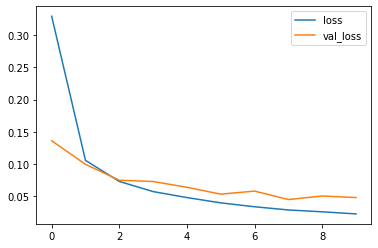

In [6]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

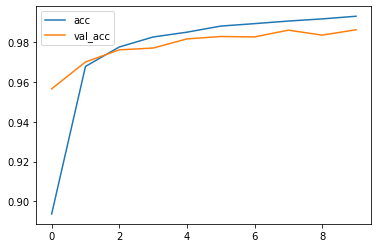

In [7]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 971    0    0    0    1    0    5    2    1    0]
 [   1 1131    0    1    0    0    2    0    0    0]
 [   2    1 1020    1    0    0    2    3    3    0]
 [   1    0    2  998    0    3    0    2    2    2]
 [   0    1    0    0  962    0    7    5    3    4]
 [   1    1    0    3    0  883    2    1    0    1]
 [   2    4    0    0    1    2  949    0    0    0]
 [   1    9    7    0    0    1    0 1009    0    1]
 [   1    1    1    5    0   11    0    1  948    6]
 [   0    0    1    1   10    0    0    5    0  992]]


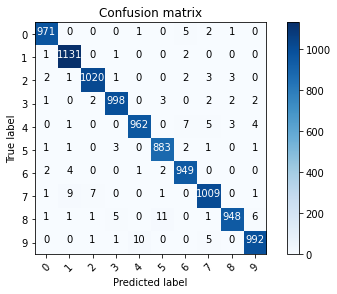

In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

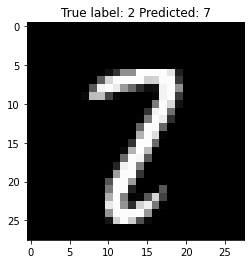

In [12]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));